In [2]:
# We will need a factorial and binomial coefficient function for some of the computations today

def factorial(n):
    
    if n < 1:
        return 1
    else:
        return n*factorial(n-1)
    
def binom(m, n):
    
    return factorial(m)/( factorial(m-n)*factorial(n))

# The Poisson Probability Distribution

Consider the following random variable:  Over a given week, at a particular traffic intersection, let $Y$ be the number of car accidents that occur. How are we going to try to understand this random variable, and add some structure to it so we can work with it.

The main idea is to break the time interval, in this case a week, into small enough intervals that it would be impossible for one of these intervals to have more than one accident. Suppose then that the probability of an accident in any of those subintervals is $p$:

$$ P(\mbox{no accidents occur in the subinterval}) = 1 - p $$
$$ P(\mbox{one accident occurs in the subinterval}) = p $$
$$ P(\mbox{more than one accident occurs in the subinterval}) = 0 $$

Then 

$$ Y = \mbox{# of subintervals in the week that contain one accident} $$

and it is a binomial random variables so with $n$ subintervals:

$$ P(Y=y) = \binom{n}{y} p^y (1-p)^{n-y} $$ 

## Limits

You know the idea now. Let's keep taking the number of subintevals to be larger (or in other words the size of the subintervals to be smaller). Of course what must happen is that the probability $p$ is decreasing as we make the subintervals smaller and eventually we expect that $p = \frac{\lambda}{n} $ (the probability is uniform in the intervals) for some $\lambda$ and $n$ subintervals for n large enough. Then the binomial probability gives:

$$ \lim_{n\to \infty} \binom{n}{y} p^y (1-p)^{n-y} = \lim_{n\to \infty} \frac{n!}{y! (n-y)!} \left( \frac{\lambda}{n} \right)^y \left( 1 - \frac{\lambda}{n} \right)^{n-y} $$

$$ = \frac{\lambda^y}{y!} \lim_{n\to \infty} \left(1 - \frac{\lambda}{n}\right)^n \times \left(1 - \frac{\lambda}{n} \right)^{-y} \times \left(1 - \frac{1}{n} \right) \times \dots \times \left(1 - \frac{y-1}{n} \right) $$

The terms other than the first term inside the limit goes to 1, and the first term gives:
$$ \lim_{n\to \infty} \left(1 - \frac{\lambda}{n} \right)^n = e^{-\lambda} $$ 

Therefore what we find is that:

$$ P(Y=y) = \frac{\lambda^y}{y!} e^{-\lambda} $$ 

Which is now independent of the subintervals we divide the week in to. Random variables possessing this distribution for some $\lambda > 0$ are called Poisson Discrete Random Variables, and this is the Poisson Probability Distribution. 


In [3]:
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_poisson(llambda, upper=20):

    yy = np.arange(upper)

    p = []
    for y in yy:
        p += [ llambda**y / factorial(y) * exp(-llambda) ]
    
    plt.figure(figsize=(12, 7))
    plt.bar(yy, p);
    
    return 1

1

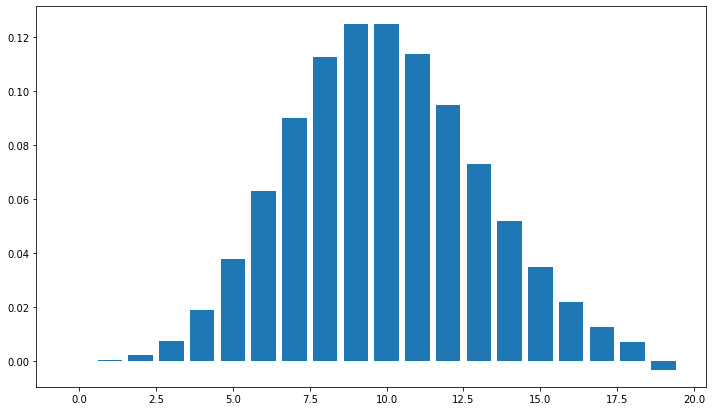

In [30]:
plot_poisson(10)

## Poisson Distribution

So play with this a bit and notice that the distribution greatly depends on the value of the parameter $\lambda$. 

There are a few things we should check:

- $$ \sum_{y=0}^\infty P(y) = 1 $$

- $$ 0 \leq P(y) \leq 1 $$

for all $\lambda$.

$$ e^{-\lambda} \sum_{y=0}^\infty \frac{\lambda^y}{y!}  $$

The sum $$ \sum_{y=0}^\infty \frac{\lambda^y}{y!} $$ is the Taylor Series of $e^{\lambda}$

We then note that $$ e^{-\lambda} e^{\lambda} = 1 $$

## Expected Value 

Let's compute the expected value for the Poisson Distribution with parameter $\lambda$:

$$ E(Y) = \sum_{y=0}^\infty y P(y) = \sum_{y=0}^\infty y \frac{\lambda^y}{y!} e^{-\lambda} $$

$$ = e^{-\lambda} \sum_{y=1}^\infty \frac{\lambda^y}{(y-1)!} $$
$$ = \lambda e^{-\lambda} \sum_{y=0}^\infty \frac{\lambda^y}{y!} $$
$$ = \lambda e^{-\lambda} e^{\lambda} = \lambda $$

So in fact the parameter $\lambda$ is the mean or expected value of the Poisson random variable. 

Likewise one can show that the variance is:  $$ \sigma^2 = V(Y) = \lambda $$ as well.

Lot's of questions involving counting the number of things over a given length, area, or volume, or over some unit of time behave like Poisson varaibles.

## Example: Customers. 

There are 33,380 customers of a website from metropolitan Denver, a region with an area of 8,345 square miles. Find the mean number of customers per square mile. Assuming the number of customers in a given area is Poisson, what is the probability that any given square mile of DMA has no customers?

In [20]:
# customers per square mile
33380 / 8345 

4.0

In [22]:
llambda = 4.0
4.0**0 / factorial(0) * exp(-4.0)

0.01831563888873418

### What about having no customers in 2 square miles:

$$ e^{-\lambda} e^{-\lambda}  = e^{-2\lambda} $$

## Example: Accidents

A company has found that the number of on the job accidents by employees during the year is a Poisson random variable, and that the mean number of accidents is 5 per year. 10 accidents happened last year, is this improbable with the historic mean i.e. does it indicate that the mean number is changing?

Note that what we are really asking here is how likely is it that the number of accidents was 10 or more - i.e. is 10 or more a likely result?

P(10)

$$ \sum_{y=10}^\infty P(y) =  1 - \sum_{y=0}^9 P(y)$$

In [23]:
llambda = 5.0
P = {}
for y in range(10):
    P[y] = llambda**y / factorial(y) * exp(-llambda)
    
1 - sum([ P[y] for y in range(10) ])

0.03182805730620475

## Example: Customers in Line

A store finds that their cashiers work with a mean of 40 customers per hour. Suppose one of the cashiers is called away from their register for 3 minutes. 

1. What is the probability that no customers arrive at their register in that time?

2. What is the expected number of customers that will be waiting for them when they return (assuming no one leaves the store).

In [27]:
llambda = 38/60 #customers / hour * hours / minutes = customers / minute

llambda

0.6333333333333333

In [28]:
exp( - 3*llambda) 

0.14956861922263506

In [29]:
3*llambda

1.9

## Poisson Approximation

The Poisson distribution gives a useful approximation to the binomial distribution when the parameter $n$ the number of trials is large (it is more or less part of the derivation of the Poisson distribution).  However with modern computers this is less useful than it used to be. In any case consider a Binomial Random Variable $Y$ with $n = 25$ and $p=0.15$.

- Compute the exact value of $P(Y\leq 5)$.

In [38]:
p = 0.15
P = {}
for y in range(6):
    P[y] = binom(80, y) * p**y * (1-p)**(80-y)
    
sum([P[y] for y in range(6) ])

0.014022610006949848

- Compute the Poisson Probability $P(Y\leq 5)$ using $\lambda = n p $.

In [39]:
llambda = 80*p
llambda

12.0

In [40]:
PP = {}
for y in range(6):
    PP[y] = llambda**y / factorial(y) * exp(-llambda) 
    
sum([ PP[y] for y in range(6)])

0.02034102941692837

Repeate the computation with larger values of n and note that the Poisson approximation becomes more accurate.

# Other Discrete Distributions

We will move on now to continuous distributions, but it is worth noting we have skipped a few common and useful discrete distributions that come up in other contexts:

- Multinomial Distribution:  Similar to a Binomial Distribution but where the individual trials can have multiple outcomes instead of just success and failure. Think:  What is the grade distribution for a group of 25 students in a Calculus class?

- Negative Binomial Distribution: A generalization of the Geometric Distribution to asking how long we need to wait for the 2nd, 3rd, etc. successful trial.

- Hypergeometric Distribution: This is a distirbution found when we are sampling n trials from a population without replacement. The difference being that the trials in the sample are now dependent on each other.

